In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv'

passageiros = pd.read_csv(url)
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [3]:
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['font.size'] = (22)

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

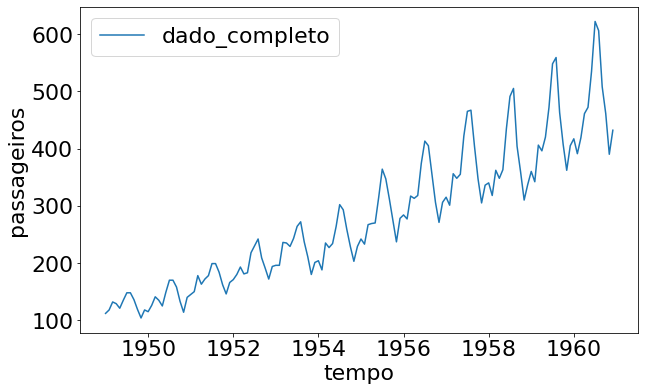

In [4]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')

# escalar os dados através do préprocessamento

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
sc = StandardScaler()

In [7]:
sc.fit(passageiros)

StandardScaler()

In [8]:
dado_escalado = sc.transform(passageiros)

In [9]:
x = dado_escalado[:,0]     #passou a coluna 0 = tempo
y = dado_escalado[:,1]     #passou a coluna 1 = passageiros

In [10]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Data')

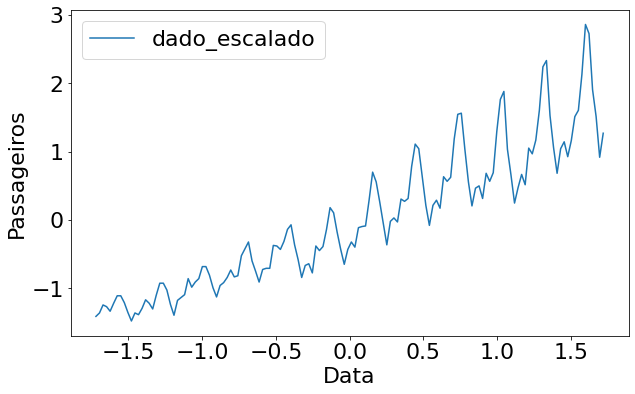

In [11]:
sns.lineplot(x=x, y=y, label='dado_escalado')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [12]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros) - tamanho_treino

In [13]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

Text(0.5, 0, 'Data')

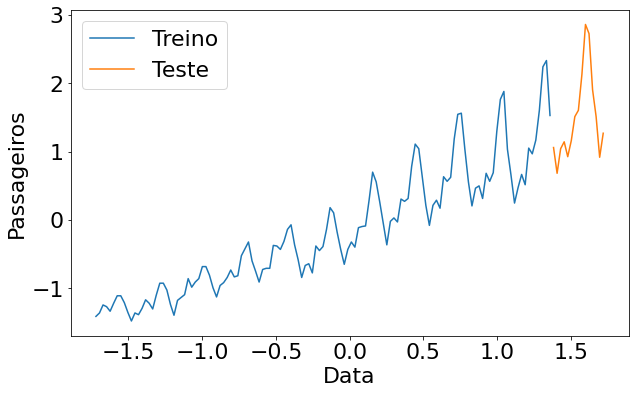

In [14]:
sns.lineplot(x=xtreino, y=ytreino, label='Treino')
sns.lineplot(x=xteste, y=yteste, label='Teste')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
regressor = Sequential()

In [17]:
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones', activation='linear', use_bias=False))

In [18]:
regressor.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [20]:
regressor.fit(xtreino, ytreino)

5/5 [==============================] - 0s 399us/step - loss: 0.1288


In [21]:
y_predict = regressor.predict(xtreino)

<AxesSubplot:>

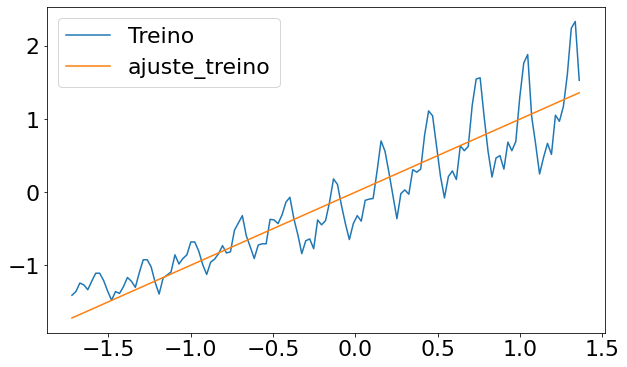

In [22]:
sns.lineplot(x=xtreino, y=ytreino, label='Treino')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')

In [23]:
d = {'tempo': xtreino, 'passageiros': y_predict[:,0]}

In [24]:
resultados = pd.DataFrame(data=d)
resultados.head()

,tempo,passageiros
0,-1.720064,-1.717808
1,-1.696007,-1.693782
2,-1.671950,-1.669757
3,-1.647894,-1.645732
4,-1.623837,-1.621706


In [25]:
resultado_transf = sc.inverse_transform(resultados)

In [26]:
resultado_transf = pd.DataFrame(resultado_transf)

In [27]:
resultado_transf.columns = ['tempo', 'passageiros']

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

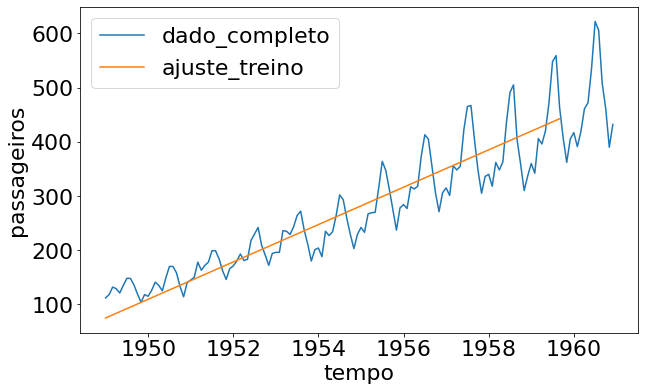

In [28]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='ajuste_treino')

In [29]:
y_predict_teste = regressor.predict(xteste)

In [30]:
d = {'tempo' : xteste, 'passageiros': y_predict_teste[:,0]}
resultados_teste  = pd.DataFrame(data=d)

In [31]:
resultado_transf_teste = sc.inverse_transform(resultados_teste)

In [32]:
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)

In [33]:
resultado_transf_teste.columns = ['tempo', 'passageiros']

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

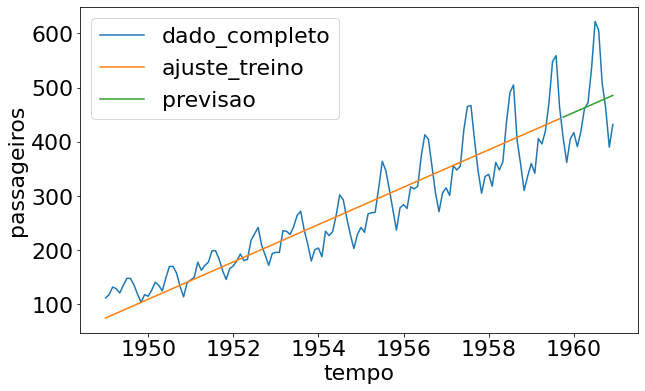

In [34]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='ajuste_treino')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf_teste, label='previsao')

In [35]:
regressor2 = Sequential()

In [36]:
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

regressor2.add(Dense(8, kernel_initializer='random_uniform', activation='linear', use_bias=False))

regressor2.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [37]:
regressor2.compile(loss='mean_squared_error', optimizer='adam')

In [38]:
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [39]:
regressor2.fit(xtreino, ytreino, epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 404us/step - loss: 0.8096
Epoch 2/200
5/5 [==============================] - 0s 393us/step - loss: 0.8089
Epoch 3/200
5/5 [==============================] - 0s 399us/step - loss: 0.8080
Epoch 4/200
5/5 [==============================] - 0s 399us/step - loss: 0.8069
Epoch 5/200
5/5 [==============================] - 0s 399us/step - loss: 0.8054
Epoch 6/200
5/5 [==============================] - 0s 199us/step - loss: 0.8033
Epoch 7/200
5/5 [==============================] - 0s 399us/step - loss: 0.8005
Epoch 8/200
5/5 [==============================] - 0s 399us/step - loss: 0.7964
Epoch 9/200
5/5 [==============================] - 0s 399us/step - loss: 0.7911
Epoch 10/200
5/5 [==============================] - 0s 399us/step - loss: 0.7838
Epoch 11/200
5/5 [==============================] - 0s 199us/step - loss: 0.7748
Epoch 12/200
5/5 [==============================] - 0s 399us/step - loss: 0.7628
Epoch 13/200
5/5 [===================

5/5 [==============================] - 0s 199us/step - loss: 0.1216
Epoch 103/200
5/5 [==============================] - 0s 399us/step - loss: 0.1216
Epoch 104/200
5/5 [==============================] - 0s 399us/step - loss: 0.1216
Epoch 105/200
5/5 [==============================] - 0s 201us/step - loss: 0.1217
Epoch 106/200
5/5 [==============================] - 0s 399us/step - loss: 0.1216
Epoch 107/200
5/5 [==============================] - 0s 200us/step - loss: 0.1216
Epoch 108/200
5/5 [==============================] - 0s 399us/step - loss: 0.1216
Epoch 109/200
5/5 [==============================] - 0s 200us/step - loss: 0.1217
Epoch 110/200
5/5 [==============================] - 0s 399us/step - loss: 0.1216
Epoch 111/200
5/5 [==============================] - 0s 399us/step - loss: 0.1217
Epoch 112/200
5/5 [==============================] - 0s 399us/step - loss: 0.1217
Epoch 113/200
5/5 [==============================] - 0s 200us/step - loss: 0.1218
Epoch 114/200
5/5 [===========

In [40]:
y_predict = regressor2.predict(xtreino)

In [41]:
y_predict_teste = regressor2.predict(xteste)

<AxesSubplot:>

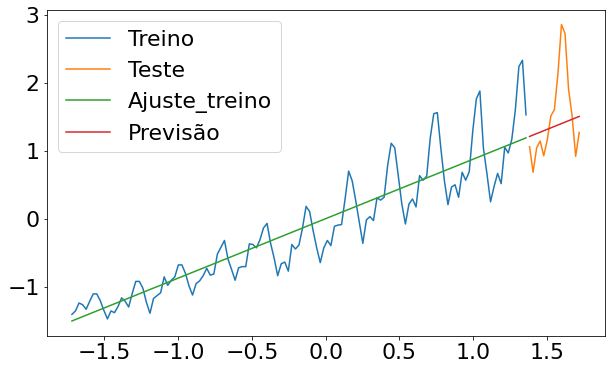

In [42]:
sns.lineplot(x=xtreino, y=ytreino, label='Treino')
sns.lineplot(x=xteste, y=yteste, label='Teste')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='Ajuste_treino')
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label='Previsão')

In [43]:
regressor3 = Sequential()

regressor3.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))

regressor3.add(Dense(8, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))

regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

regressor3.compile(loss='mean_squared_error', optimizer='adam')

In [44]:
regressor3.fit(xtreino, ytreino, epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 390us/step - loss: 0.7952
Epoch 2/500
5/5 [==============================] - 0s 199us/step - loss: 0.7933
Epoch 3/500
5/5 [==============================] - 0s 399us/step - loss: 0.7910
Epoch 4/500
5/5 [==============================] - 0s 399us/step - loss: 0.7892
Epoch 5/500
5/5 [==============================] - 0s 399us/step - loss: 0.7880
Epoch 6/500
5/5 [==============================] - 0s 199us/step - loss: 0.7882
Epoch 7/500
5/5 [==============================] - 0s 399us/step - loss: 0.7878
Epoch 8/500
5/5 [==============================] - 0s 399us/step - loss: 0.7866
Epoch 9/500
5/5 [==============================] - 0s 399us/step - loss: 0.7854
Epoch 10/500
5/5 [==============================] - 0s 399us/step - loss: 0.7849
Epoch 11/500
5/5 [==============================] - 0s 399us/step - loss: 0.7846
Epoch 12/500
5/5 [==============================] - 0s 399us/step - loss: 0.7845
Epoch 13/500
5/5 [===================

5/5 [==============================] - 0s 399us/step - loss: 0.7636
Epoch 103/500
5/5 [==============================] - 0s 200us/step - loss: 0.7634
Epoch 104/500
5/5 [==============================] - 0s 399us/step - loss: 0.7630
Epoch 105/500
5/5 [==============================] - 0s 399us/step - loss: 0.7624
Epoch 106/500
5/5 [==============================] - 0s 399us/step - loss: 0.7608
Epoch 107/500
5/5 [==============================] - 0s 200us/step - loss: 0.7598
Epoch 108/500
5/5 [==============================] - 0s 200us/step - loss: 0.7587
Epoch 109/500
5/5 [==============================] - 0s 399us/step - loss: 0.7577
Epoch 110/500
5/5 [==============================] - 0s 399us/step - loss: 0.7567
Epoch 111/500
5/5 [==============================] - 0s 399us/step - loss: 0.7559
Epoch 112/500
5/5 [==============================] - 0s 399us/step - loss: 0.7554
Epoch 113/500
5/5 [==============================] - 0s 399us/step - loss: 0.7553
Epoch 114/500
5/5 [===========

5/5 [==============================] - 0s 399us/step - loss: 0.6415
Epoch 203/500
5/5 [==============================] - 0s 399us/step - loss: 0.6399
Epoch 204/500
5/5 [==============================] - 0s 199us/step - loss: 0.6381
Epoch 205/500
5/5 [==============================] - 0s 399us/step - loss: 0.6365
Epoch 206/500
5/5 [==============================] - 0s 399us/step - loss: 0.6350
Epoch 207/500
5/5 [==============================] - 0s 399us/step - loss: 0.6336
Epoch 208/500
5/5 [==============================] - 0s 399us/step - loss: 0.6317
Epoch 209/500
5/5 [==============================] - 0s 399us/step - loss: 0.6305
Epoch 210/500
5/5 [==============================] - 0s 399us/step - loss: 0.6282
Epoch 211/500
5/5 [==============================] - 0s 399us/step - loss: 0.6270
Epoch 212/500
5/5 [==============================] - 0s 399us/step - loss: 0.6254
Epoch 213/500
5/5 [==============================] - 0s 399us/step - loss: 0.6232
Epoch 214/500
5/5 [===========

5/5 [==============================] - 0s 399us/step - loss: 0.4722
Epoch 303/500
5/5 [==============================] - 0s 199us/step - loss: 0.4710
Epoch 304/500
5/5 [==============================] - 0s 399us/step - loss: 0.4696
Epoch 305/500
5/5 [==============================] - 0s 399us/step - loss: 0.4681
Epoch 306/500
5/5 [==============================] - 0s 200us/step - loss: 0.4667
Epoch 307/500
5/5 [==============================] - 0s 399us/step - loss: 0.4647
Epoch 308/500
5/5 [==============================] - 0s 399us/step - loss: 0.4632
Epoch 309/500
5/5 [==============================] - 0s 399us/step - loss: 0.4620
Epoch 310/500
5/5 [==============================] - 0s 399us/step - loss: 0.4606
Epoch 311/500
5/5 [==============================] - 0s 399us/step - loss: 0.4600
Epoch 312/500
5/5 [==============================] - 0s 200us/step - loss: 0.4588
Epoch 313/500
5/5 [==============================] - 0s 399us/step - loss: 0.4573
Epoch 314/500
5/5 [===========

5/5 [==============================] - 0s 199us/step - loss: 0.3315
Epoch 403/500
5/5 [==============================] - 0s 399us/step - loss: 0.3301
Epoch 404/500
5/5 [==============================] - 0s 399us/step - loss: 0.3287
Epoch 405/500
5/5 [==============================] - 0s 200us/step - loss: 0.3276
Epoch 406/500
5/5 [==============================] - 0s 399us/step - loss: 0.3267
Epoch 407/500
5/5 [==============================] - 0s 200us/step - loss: 0.3257
Epoch 408/500
5/5 [==============================] - 0s 399us/step - loss: 0.3247
Epoch 409/500
5/5 [==============================] - 0s 200us/step - loss: 0.3239
Epoch 410/500
5/5 [==============================] - 0s 199us/step - loss: 0.3228
Epoch 411/500
5/5 [==============================] - 0s 399us/step - loss: 0.3219
Epoch 412/500
5/5 [==============================] - 0s 199us/step - loss: 0.3206
Epoch 413/500
5/5 [==============================] - 0s 399us/step - loss: 0.3193
Epoch 414/500
5/5 [===========

In [45]:
y_predict = regressor3.predict(xtreino)
y_predict_teste = regressor3.predict(xteste)

<AxesSubplot:>

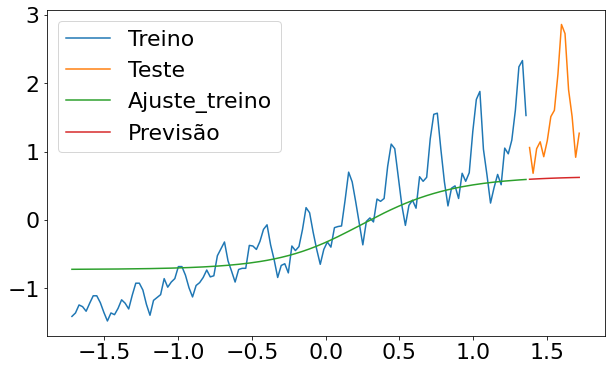

In [46]:
sns.lineplot(x=xtreino, y=ytreino, label='Treino')
sns.lineplot(x=xteste, y=yteste, label='Teste')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='Ajuste_treino')
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label='Previsão')

In [47]:
import numpy as np

In [48]:
vetor = pd.DataFrame(ytreino)[0]

In [49]:
def separa_dados(vetor, n_passos):
    X_novo, y_novo = [], []
    
    for i in range(n_passos, vetor.shape[0]):
        X_novo.append(list(vetor.loc[i-n_passos:i-1]))
        y_novo.append(vetor.loc[i])
    X_novo, y_novo = np.array(X_novo), np.array(y_novo)
    return X_novo, y_novo

In [50]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 1)

In [51]:
xtreino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [52]:
ytreino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [53]:
vetor2 = pd.DataFrame(yteste)[0]

In [54]:
xteste_novo, yteste_novo = separa_dados(vetor2, 1)

In [55]:
regressor3 = Sequential()

regressor3.add(Dense(8, input_dim=1, kernel_initializer='Ones', activation='linear', use_bias=False))

regressor3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))

regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [56]:
regressor3.compile(loss='mean_squared_error', optimizer='adam')

In [57]:
regressor3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 64        
Total params: 584
Trainable params: 584
Non-trainable params: 0
_________________________________________________________________


In [58]:
regressor3.fit(xtreino_novo, ytreino_novo, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 249us/step - loss: 0.7706
Epoch 2/100
4/4 [==============================] - 0s 250us/step - loss: 0.7434
Epoch 3/100
4/4 [==============================] - 0s 249us/step - loss: 0.7263
Epoch 4/100
4/4 [==============================] - 0s 498us/step - loss: 0.7006
Epoch 5/100
4/4 [==============================] - 0s 250us/step - loss: 0.6766
Epoch 6/100
4/4 [==============================] - 0s 249us/step - loss: 0.6501
Epoch 7/100
4/4 [==============================] - 0s 249us/step - loss: 0.6212
Epoch 8/100
4/4 [==============================] - 0s 499us/step - loss: 0.5943
Epoch 9/100
4/4 [==============================] - 0s 249us/step - loss: 0.5616
Epoch 10/100
4/4 [==============================] - 0s 249us/step - loss: 0.5287
Epoch 11/100
4/4 [==============================] - 0s 499us/step - loss: 0.4921
Epoch 12/100
4/4 [==============================] - 0s 249us/step - loss: 0.4545
Epoch 13/100
4/4 [===================

In [59]:
y_predict_novo = regressor3.predict(xtreino_novo)

<AxesSubplot:xlabel='tempo', ylabel='0'>

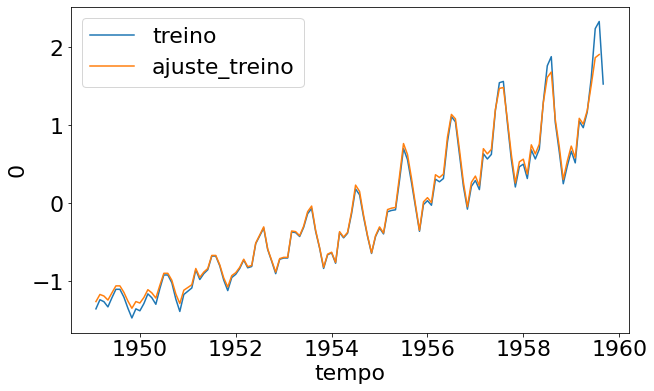

In [60]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')

In [61]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

In [62]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<AxesSubplot:xlabel='tempo', ylabel='0'>

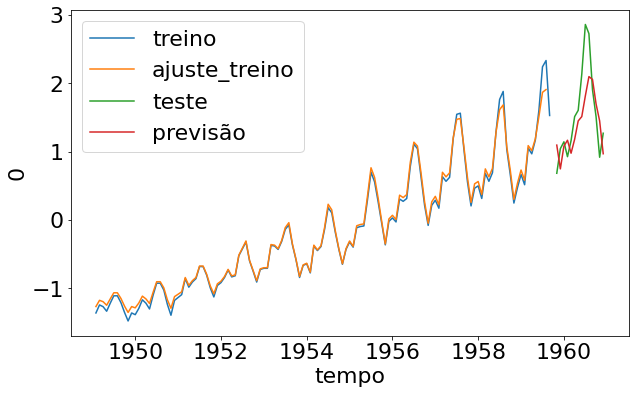

In [63]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[130:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[130:144], label='previsão')

In [77]:
xteste_novo, yteste_novo = separa_dados(vetor2,4)

In [78]:
xtreino_novo[0:5]

array([[1.05982773, 0.68341317, 1.04309819, 1.14347541],
       [0.68341317, 1.04309819, 1.14347541, 0.92599144],
       [1.04309819, 1.14347541, 0.92599144, 1.16020494],
       [1.14347541, 0.92599144, 1.16020494, 1.5115252 ],
       [0.92599144, 1.16020494, 1.5115252 , 1.60353765]])

In [79]:
ytreino_novo[0:5]

array([0.92599144, 1.16020494, 1.5115252 , 1.60353765, 2.13051803])

In [80]:
regressor4 = Sequential()

regressor4.add(Dense(8, input_dim=4, kernel_initializer='Ones', activation='linear', use_bias=False))

regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))

regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [81]:
regressor4.compile(loss='mean_squared_error', optimizer='adam')

In [82]:
regressor4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 8)                 32        
_________________________________________________________________
dense_14 (Dense)             (None, 64)                512       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 64        
Total params: 608
Trainable params: 608
Non-trainable params: 0
_________________________________________________________________


In [83]:
regressor4.fit(xtreino_novo, ytreino_novo, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 997us/step - loss: 3.0333
Epoch 2/300
1/1 [==============================] - 0s 0s/step - loss: 2.8634
Epoch 3/300
1/1 [==============================] - 0s 0s/step - loss: 2.6994
Epoch 4/300
1/1 [==============================] - 0s 0s/step - loss: 2.5413
Epoch 5/300
1/1 [==============================] - 0s 997us/step - loss: 2.3893
Epoch 6/300
1/1 [==============================] - 0s 0s/step - loss: 2.2434
Epoch 7/300
1/1 [==============================] - 0s 998us/step - loss: 2.1036
Epoch 8/300
1/1 [==============================] - 0s 0s/step - loss: 1.9699
Epoch 9/300
1/1 [==============================] - 0s 997us/step - loss: 1.8422
Epoch 10/300
1/1 [==============================] - 0s 0s/step - loss: 1.7206
Epoch 11/300
1/1 [==============================] - 0s 997us/step - loss: 1.6050
Epoch 12/300
1/1 [==============================] - 0s 995us/step - loss: 1.4954
Epoch 13/300
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 0s/step - loss: 0.3704
Epoch 105/300
1/1 [==============================] - 0s 998us/step - loss: 0.3703
Epoch 106/300
1/1 [==============================] - 0s 0s/step - loss: 0.3703
Epoch 107/300
1/1 [==============================] - 0s 0s/step - loss: 0.3702
Epoch 108/300
1/1 [==============================] - 0s 0s/step - loss: 0.3702
Epoch 109/300
1/1 [==============================] - 0s 0s/step - loss: 0.3702
Epoch 110/300
1/1 [==============================] - 0s 997us/step - loss: 0.3701
Epoch 111/300
1/1 [==============================] - 0s 0s/step - loss: 0.3701
Epoch 112/300
1/1 [==============================] - 0s 998us/step - loss: 0.3700
Epoch 113/300
1/1 [==============================] - 0s 0s/step - loss: 0.3700
Epoch 114/300
1/1 [==============================] - 0s 997us/step - loss: 0.3700
Epoch 115/300
1/1 [==============================] - 0s 0s/step - loss: 0.3699
Epoch 116/300
1/1 [==============================] - 0

1/1 [==============================] - 0s 0s/step - loss: 0.3661
Epoch 207/300
1/1 [==============================] - 0s 998us/step - loss: 0.3661
Epoch 208/300
1/1 [==============================] - 0s 0s/step - loss: 0.3660
Epoch 209/300
1/1 [==============================] - 0s 998us/step - loss: 0.3660
Epoch 210/300
1/1 [==============================] - 0s 0s/step - loss: 0.3659
Epoch 211/300
1/1 [==============================] - 0s 0s/step - loss: 0.3659
Epoch 212/300
1/1 [==============================] - 0s 998us/step - loss: 0.3658
Epoch 213/300
1/1 [==============================] - 0s 0s/step - loss: 0.3658
Epoch 214/300
1/1 [==============================] - 0s 998us/step - loss: 0.3658
Epoch 215/300
1/1 [==============================] - 0s 0s/step - loss: 0.3657
Epoch 216/300
1/1 [==============================] - 0s 0s/step - loss: 0.3657
Epoch 217/300
1/1 [==============================] - 0s 998us/step - loss: 0.3656
Epoch 218/300
1/1 [==============================] 

In [84]:
y_predict_novo = regressor4.predict(xtreino_novo)

In [85]:
y_predict_teste_novo = regressor4.predict(xteste_novo)

In [86]:
resultado_treino = pd.DataFrame(y_predict_novo)[0]

In [87]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

In [89]:
# nao está funcionando

# sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[4:129], label='treino')
# sns.lineplot(x='tempo', y=resultado_treino.values, data=passageiros[4:129], label='ajuste_treino')

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 125 and the vector passed to `y` has length 11.